In [1]:
!pip install dash

     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 3.7 MB 28.3 MB/s 
     |████████████████████████████████| 83 kB 1.1 MB/s 
     |████████████████████████████████| 1.8 MB 24.3 MB/s 
     |████████████████████████████████| 357 kB 45.5 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100489 sha256=1a339da4664655e793a96499c49734623b75aeba155d90a32044b7d6686a676a
  Stored in directory: /root/.cache/pip/wheels/59/a4/f1/a7140afcad8dbaa3b1b12ef80843d29403d6ecca1c2f397948
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738995 sha256=0a1455a6235a789e0b9f83ff4043926abfeaad3353219e80783fcb0d261d296b
  Stored in directory: /root/.cache/pip/wheels/ca/5b/fb/a135a7bf8e21223e4104aa5526a5173a20b64fe7fcd055b999
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319771 sha256=211aeefb7cf96989cf8e57a5ea02ec8b5fe4538993c9c2ac61ac730

In [2]:
import numpy as np
import pandas as pd
import math

from google.colab import drive
#drive.mount('/content/drive')

!pip install geopandas
import geopy
import geopandas as gpd
from geopandas.tools import sjoin
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
from geopy import geocoders
import difflib

import holoviews as hv
import plotly.graph_objects as go
import plotly.express as pex
import itertools


     |████████████████████████████████| 994 kB 4.9 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 6.6 MB 43.8 MB/s 


In [3]:
!gdown --id 1N1rjqQZdTjPmQ6hbXuVzlsB1ZjPcBkBf -O Cleaned_SWFacilities.csv
!gdown --id 1-zqbTzyRF32GWRbmrL4mXwdhFBgy3CsT -O new-york-state-city-and-town-boundaries.csv
!gdown --id 1ZMAdUMseQbZYWU6o9jlfuJYbKAh7hwPJ -O new-york-state-city-and-town-boundaries.shp
!gdown --id 1Fp3CUFh1zPvdX0JzawYYA6OSNOoPK8o3 -O new-york-state-city-and-town-boundaries.shx

Downloading...
From: https://drive.google.com/uc?id=1N1rjqQZdTjPmQ6hbXuVzlsB1ZjPcBkBf
To: /content/Cleaned_SWFacilities.csv
100% 948k/948k [00:00<00:00, 57.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-zqbTzyRF32GWRbmrL4mXwdhFBgy3CsT
To: /content/new-york-state-city-and-town-boundaries.csv
28.3MB [00:00, 131MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1ZMAdUMseQbZYWU6o9jlfuJYbKAh7hwPJ
To: /content/new-york-state-city-and-town-boundaries.shp
12.3MB [00:00, 109MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Fp3CUFh1zPvdX0JzawYYA6OSNOoPK8o3
To: /content/new-york-state-city-and-town-boundaries.shx
100% 8.05k/8.05k [00:00<00:00, 6.79MB/s]


In [4]:
SWfacilities = pd.read_csv('Cleaned_SWFacilities.csv')
SWfacilities_to_dict = SWfacilities[['Region','County']].drop_duplicates()
SWfacilities_to_dict = SWfacilities_to_dict.reset_index(drop=True)

In [5]:
region_dict = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
for i in SWfacilities_to_dict.index:
  (region_dict[SWfacilities_to_dict.iloc[i].Region]).append(SWfacilities_to_dict.iloc[i].County)
region_dict[8].append('Ontario, Seneca')

In [6]:
x = gpd.read_file('new-york-state-city-and-town-boundaries.shp')

In [7]:
y = pd.read_csv('new-york-state-city-and-town-boundaries.csv')
NYS = x.join(y)
NYS['COUNTY'] = NYS.COUNTY.replace({'St Lawrence':'St. Lawrence'})

In [8]:
NYS['Region'] = ''
for i in NYS.index:
  for key in region_dict:
    if NYS['COUNTY'][i] in (region_dict[key]):
      NYS['Region'][i] = key

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
NYS[NYS['Region'] == '']

,geometry,WKT,POP2000,POP2010,NAME,GNIS_ID,DOS_LL_DATE,POP1990,COUNTY,MAP_SYMBOL,CALC_SQMI,DOS_LL,DATEMOD,MUNI_TYPE,SWIS,Region
986,"MULTIPOLYGON (((-74.04029 40.70013, -74.04028 ...",MULTIPOLYGON Z (((-74.0402905130611 40.7001303...,8008278,8175133,New York,2395220,NaN,7322564,"New York, Bronx, Kings, Richmond, Queens",3,469.64521,NaN,NaN,city,650000,


In [10]:
NYS.at[986,'Region'] = 2

In [11]:
!gdown --id 19hG9d7uwc7Cw4-IGTQLcj60fp-ve0U_2 -O new-york-city-boroughs.shx
!gdown --id 1yry7oXZIYWSvdbPbFF1r2z6GSCff-KJv -O new-york-city-boroughs.shp
!gdown --id 10qbisIl0Q3HSMcGqRciswj66xfn2m8G- -O new-york-city-boroughs.csv

Downloading...
From: https://drive.google.com/uc?id=19hG9d7uwc7Cw4-IGTQLcj60fp-ve0U_2
To: /content/new-york-city-boroughs.shx
100% 140/140 [00:00<00:00, 237kB/s]
Downloading...
From: https://drive.google.com/uc?id=1yry7oXZIYWSvdbPbFF1r2z6GSCff-KJv
To: /content/new-york-city-boroughs.shp
100% 55.9k/55.9k [00:00<00:00, 47.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=10qbisIl0Q3HSMcGqRciswj66xfn2m8G-
To: /content/new-york-city-boroughs.csv
100% 128k/128k [00:00<00:00, 18.8MB/s]


In [12]:
boro = gpd.read_file('new-york-city-boroughs.shp')
boro_csv = pd.read_csv('new-york-city-boroughs.csv')

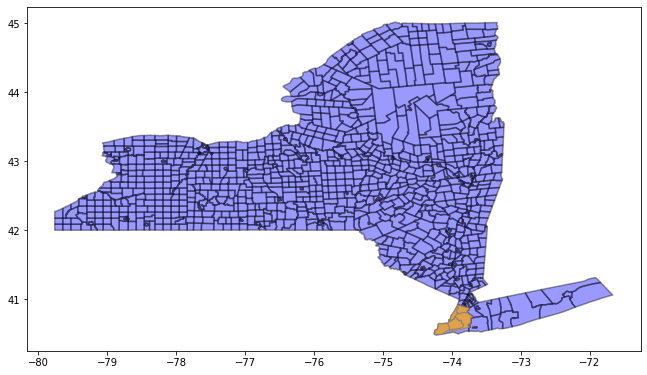

In [13]:
ax = NYS.plot(color='blue', alpha = 0.4, edgecolor='black', linewidths=1.5,figsize = (11,15))
boro.plot(ax=ax, color='orange',alpha = 0.7, edgecolor='grey', linewidths=1)

In [14]:
!gdown --id 1xpLNDACWt5hktxzjIhSOjLVjKoQpOVEV -O trip_data.csv
!gdown --id 190UYdime7hUxNVZSFnlVi9vS-WHFJ7Tk -O monthly_CDW.csv
!gdown --id 1c66bcE4gXAIX1aPdv1XSsv86EDrrGpdr -O LF_caps.csv

Downloading...
From: https://drive.google.com/uc?id=1xpLNDACWt5hktxzjIhSOjLVjKoQpOVEV
To: /content/trip_data.csv
100% 885k/885k [00:00<00:00, 47.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=190UYdime7hUxNVZSFnlVi9vS-WHFJ7Tk
To: /content/monthly_CDW.csv
100% 107k/107k [00:00<00:00, 41.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1c66bcE4gXAIX1aPdv1XSsv86EDrrGpdr
To: /content/LF_caps.csv
100% 8.21k/8.21k [00:00<00:00, 3.16MB/s]


In [15]:
trip_data = pd.read_csv('trip_data.csv')
trip_data = trip_data.drop(columns = ['Unnamed: 0'])
monthly_CDW = pd.read_csv('monthly_CDW.csv').drop(columns = ['Unnamed: 0'])
LF_caps = pd.read_csv('LF_caps.csv').drop(columns = ['Unnamed: 0'])

In [16]:
table = str.maketrans(dict.fromkeys("()"))

In [17]:
trip_data_gpd = trip_data[['Facility ID','Service Area Address','Service Area Coordinates']]
trip_data_gpd['Service Area Coordinates'] = trip_data_gpd['Service Area Coordinates'].str.translate(table)
new = trip_data_gpd['Service Area Coordinates'].str.split(',',1,expand = True)
trip_data_gpd['SA Long'] = new[0]
trip_data_gpd['SA Lat'] = new[1]
trip_data_gpd = gpd.GeoDataFrame(trip_data_gpd, geometry=gpd.points_from_xy(trip_data_gpd['SA Long'], trip_data_gpd['SA Lat']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [18]:
#carried out spatial join in jupyter - there's a bug in colab that won't run this code
#sjoin(trip_data_gpd, NYS, how="inner")

In [19]:
!gdown --id 1SaGTCrCoBrrBFUr3vcR4L1N8mDKIQ9K4 -O NYS_joined.csv
!gdown --id 1n4Gl3Q-uO3ZpgFTR_I-3JXQBwUQrFSBQ -O NYS_joined.shx
!gdown --id 1WDc0TWXM3XcsofpPHgE2MjsL5iCGX6DH -O NYS_joined.shp

Downloading...
From: https://drive.google.com/uc?id=1SaGTCrCoBrrBFUr3vcR4L1N8mDKIQ9K4
To: /content/NYS_joined.csv
145MB [00:01, 81.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n4Gl3Q-uO3ZpgFTR_I-3JXQBwUQrFSBQ
To: /content/NYS_joined.shx
100% 27.8k/27.8k [00:00<00:00, 23.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WDc0TWXM3XcsofpPHgE2MjsL5iCGX6DH
To: /content/NYS_joined.shp
100% 97.1k/97.1k [00:00<00:00, 48.2MB/s]


In [20]:
NYS_joined = pd.read_csv('NYS_joined.csv').drop(columns = ['Unnamed: 0'])
x = NYS_joined[['Service Area Address','Region']].drop_duplicates()
trip_data = trip_data.merge(x,on='Service Area Address').rename(columns = {'Region':'SA Region'})

In [21]:
diff = trip_data['SA Region'] - trip_data['Facility Region']

In [22]:
sum(diff) #sanity check that they don't all start and end at the same location

-448

## Timeline

In [23]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

In [24]:
material_list = ['Concrete', 'Masonry', 'Asphalt and Road Material', 'Sand', 'Soil', 'Yard Waste', 'General C&D Debris', 'Fill', 'Wood', 'Metals', 
                 'Old Corrugated Containers', 'Rock, Stone, and Gravel','Asphalt Roofing Shingles', 'Residue', 'Gypsum','Tires', 'Asphalt Roofing Shingles',
                 'Auto Fluff','Asbestos', 'Ash & Cement Alternatives',]
region_list = [1,2,3,4,5,6,7,8,9]

In [29]:
def timeline(df = monthly_CDW,mat_list = material_list, regions = region_list, year = 2020):
  df = df[df.Year == year][df.Material.isin(mat_list)][df.Region.isin(regions)]\
                                  [['Material','Region','January (tons)', 'February (tons)', 'March (tons)', 'April (tons)', 'May (tons)', 'June (tons)',
                                    'July (tons)', 'August (tons)', 'September (tons)', 'October (tons)', 'November (tons)', 'December (tons)']]\
                                    .groupby(['Material']).sum().drop(columns=['Region']).reset_index()
  df = pd.melt(df,id_vars='Material',value_vars=list(df.columns[1:]), var_name='Months', value_name='Total Quantities')
  fig = px.bar(df, x="Months", y="Total Quantities", color='Material')
  fig.show()


In [26]:
timeline()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [44]:
timeline_2020(df = monthly_CDW, mat_list = ['Other'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [43]:
timeline(year = 2019)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



## Sankey

In [ ]:
trip_data['Facility Type'].unique()

array(['Transfer Facility', 'Landfill'], dtype=object)

In [36]:
def label_(df):
  destiny_range = list(range(1,len(df.Destiny.unique())+1))
  destiny_list = list(df.Destiny.unique())
  destiny_dict = dict(zip(destiny_range, destiny_list))
  df['label'] = ''
  for i in df.index:
    for key in destiny_dict:
      if df['Destiny'][i] in (destiny_dict[key]):
        df['label'][i] = key
  return(df)

In [37]:
def sankey_destiny(df, region, year, type_):

  if type_ == 'Transfer Facility':
    direction_ = ['Outgoing']
  else:
    direction_ = ['Outgoing','Not Applicable']
  df = df[df['Facility Type']==type_]
  df = df[df.Year == year][df.Direction.isin(direction_)][df['Facility Region'] == region]\
                          [['Material','Facility Region','Amount/tons','Destiny']].groupby(['Facility Region','Material','Destiny']).sum().reset_index()\
                          .drop(columns = ['Facility Region'])

  list_mats= ['Concrete', 'Masonry', 'Asphalt and Road Material', 'Sand', 'Soil', 'Yard Waste', 'General C&D Debris', 'Fill', 'Wood', 'Metals',
              'Old Corrugated Containers', 'Rock, Stone, and Gravel','Asphalt Roofing Shingles', 'Residue', 'Gypsum','Tires', 'Glass',
              'Auto Fluff','Asbestos', 'Ash & Cement Alternatives', 'Other']
  colors_links= ['#E59866', '#BA4A00', '#9B59B6','#8E44AD', '#2980B9','#3498DB', '#BDC3C7', '#45B39D','#52BE80', '#008080','#0000FF', '#000080', '#FF00FF',
                '#800080', '#9FE2BF', '#6495ED','#CCCCFF', '#FFBF00','#FF7F50', '#F39C12', '#884EA0']

  df = label_(df)

  color_dict=dict(zip(list_mats, colors_links))
  x= pd.DataFrame(list(color_dict.items()), columns=['Material', 'Color'])
  df_colored= df.merge(x, on="Material", how="left")

  fig = go.Figure(data=[go.Sankey(
      node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = ['Region '+str(region)]+list((df.Destiny.unique())),
        color = "light grey"
      ),
      link = dict(
        source = list(map(int,(list(('0'*len(df)))))), 
        target = list(df.label),
        value = [float(i) for i in list(df['Amount/tons'])],
        color=list(df_colored.Color),
        label= list(df.Material.unique())
    ))])

  fig.update_layout(title_text="Region "+str(region)+ " C+DW Flows", font_size=10)
  fig.show()
  print(df.drop(columns=['label']))


In [42]:
sankey_destiny(trip_data, 4, 2020, 'Landfill')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     Material         Destiny  Amount/tons
0  Auto Fluff        BU (AOC)      6219.40
1    Concrete  BU (Road Base)      4877.60
2        Fill        BU (AOC)     31314.23
3       Glass  BU (Road Base)     18225.01
4      Metals        Recycled       316.71
5       Other        BU (AOC)     13136.40
6       Other        Recycled       329.41
7       Tires        Recycled        31.83
